In [31]:
#import data
import numpy as np
import pandas as pd
df=pd.read_csv("D:/Datasets/AVds/train_MpHjUjU.csv")

In [12]:
df.head(5)

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


In [33]:
#use col 'LastWorkingDate' to create 'Target'
for i in range(0, len(df['LastWorkingDate'])):
     df["Target"] = [1 if pd.isna(i) else 0 for i in df["LastWorkingDate"]]

In [34]:
#check values in categorical columns for encoding to numerical type
print("Gender",df['Gender'].value_counts())
print("City",df['City'].value_counts())
print("Education Level",df['Education_Level'].value_counts())

Gender Male      11103
Female     8001
Name: Gender, dtype: int64
City C20    1008
C29     900
C26     869
C22     809
C27     786
C15     761
C10     744
C12     727
C8      712
C16     709
C28     683
C1      677
C6      660
C5      656
C14     648
C3      637
C24     614
C7      609
C21     603
C25     584
C19     579
C4      578
C13     569
C18     544
C23     538
C9      520
C2      472
C11     468
C17     440
Name: City, dtype: int64
Education Level Bachelor    6864
Master      6327
College     5913
Name: Education_Level, dtype: int64


In [35]:
#Since Gender and Education Level have 2 & 3 values these can be easily mapped
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})
df['Education_Level'] = df['Education_Level'].map({'Bachelor':1, 'Master':2,'College':0})

In [39]:
#Use labelencoder for City
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df['City'])
df['City']=le.transform(df['City'])

In [40]:
df.head(5)

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target
0,2016-01-01,1,28,1,15,2,57387,2015-12-24,NaN,1,1,2381060,2,1
1,2016-02-01,1,28,1,15,2,57387,2015-12-24,NaN,1,1,-665480,2,1
2,2016-03-01,1,28,1,15,2,57387,2015-12-24,2016-03-11,1,1,0,2,0
3,2017-11-01,2,31,1,26,2,67016,2017-11-06,NaN,2,2,0,1,1
4,2017-12-01,2,31,1,26,2,67016,2017-11-06,NaN,2,2,0,1,1


In [41]:
#check encoded value
print("City",df['City'].value_counts())

City 12    1008
21     900
18     869
14     809
19     786
6      761
1      744
3      727
27     712
7      709
20     683
0      677
25     660
24     656
5      648
22     637
16     614
26     609
13     603
17     584
10     579
23     578
4      569
9      544
15     538
28     520
11     472
2      468
8      440
Name: City, dtype: int64


In [42]:
# Change date of joining col to int
df['Dateofjoining']=df['Dateofjoining'].str.replace("-","")
df['Dateofjoining']=df['Dateofjoining'].astype(int)

In [43]:
#Drop Columns which can be ignored during modelling
df=df.drop(['LastWorkingDate'], axis=1)
df=df.drop(['Emp_ID'], axis=1)
df=df.drop(['MMM-YY'], axis=1)

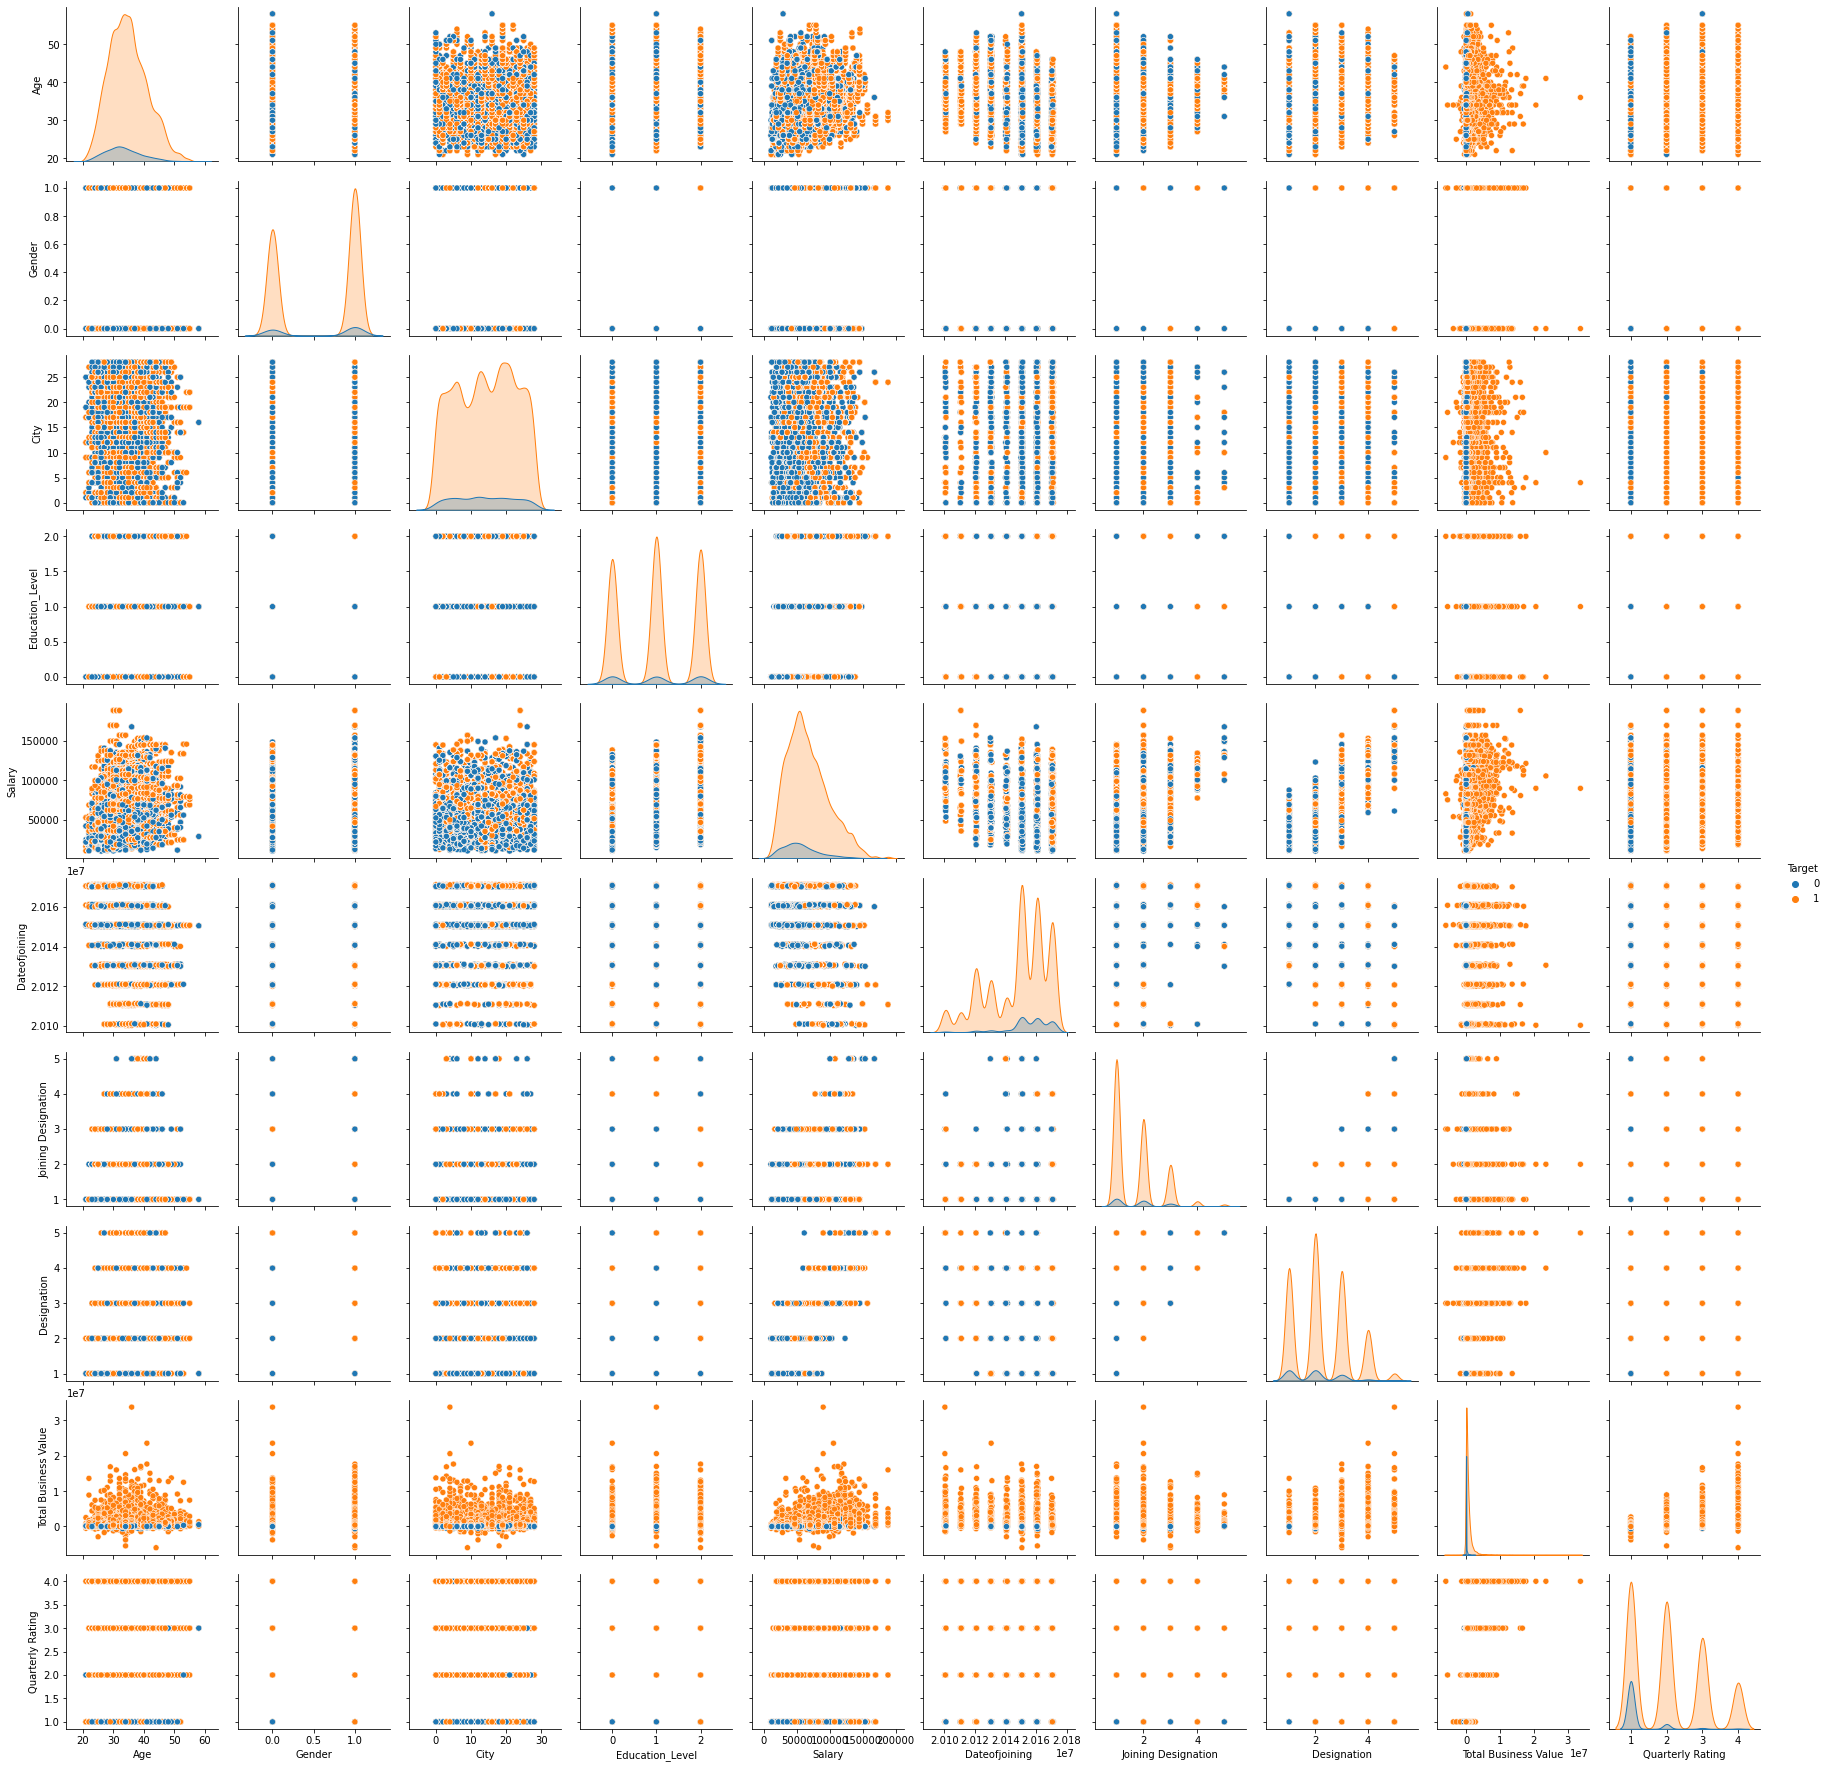

In [46]:
#check relation of variables with target and each other
import seaborn as sns
sns.pairplot(df, hue="Target")

<AxesSubplot:>

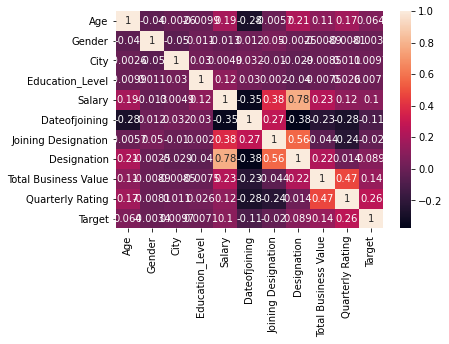

In [59]:
sns.heatmap(df.corr(),annot = True)

In [75]:
# split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Target'], axis=1), df['Target'],
                                                    test_size=0.30, random_state=42)

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [77]:
clf=LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [78]:
clf.predict_proba(X_train)

array([[0.05824473, 0.94175527],
       [0.03811785, 0.96188215],
       [0.02419032, 0.97580968],
       ...,
       [0.1906633 , 0.8093367 ],
       [0.15031   , 0.84969   ],
       [0.03388641, 0.96611359]])

In [79]:
clf.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [80]:
clf.score(X_test, y_test)

0.9096301465457083

In [81]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.14      0.00      0.01       508
           1       0.91      1.00      0.95      5224

    accuracy                           0.91      5732
   macro avg       0.53      0.50      0.48      5732
weighted avg       0.84      0.91      0.87      5732



In [82]:
#run classification 5 times
scores = cross_val_score(clf, X_test, y_test, cv=5)
scores

array([0.90932868, 0.90845684, 0.90924956, 0.91099476, 0.91012216])

In [83]:
confusion_matrix(y_test, clf.predict(X_test))

array([[   2,  506],
       [  12, 5212]], dtype=int64)

In [84]:
X_test.shape, y_test.shape

((5732, 10), (5732,))

In [85]:
print(accuracy_score(clf.predict(X_test), y_test))

0.9096301465457083
